<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/CAP4631C_Mini_project_Group_1_Anays_Garcia%2C_Martha_Requena_Master_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAP 4631C - Spring 2025# Comprehensive Assignment / Mini Project**

# **Group 1**
---

#**Anais Garcia**
#**Martha Requena**
---
---

In [322]:
# Import necessary libraries for data processing and numerical calculations
import numpy as np  # For numerical calculations
import pandas as pd  # For handling datasets

# Import visualization libraries
import matplotlib.pyplot as plt  # For data visualization

# Import dataset library
from sklearn import datasets  # For loading sample datasets

# Import model selection and evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV  # For model training, validation, and hyperparameter tuning
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# Import machine learning models - Regression
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.tree import DecisionTreeRegressor, plot_tree # Import plot_tree explicitly
from sklearn import tree  # For visualizing decision trees
from sklearn.preprocessing import PolynomialFeatures  # Creating polynomial features
from sklearn.pipeline import Pipeline  # Automating preprocessing + modeling
from sklearn.preprocessing import StandardScaler # Used to center or standardize the desised variable(s)

# Import ensemble learning models - Forest-based
from sklearn.ensemble import RandomForestRegressor  # Random forest regression model
from sklearn.ensemble import ExtraTreesRegressor  # Extremely Randomized Trees for regression

# Import ensemble learning models - Boosting
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting regression model
from sklearn.ensemble import AdaBoostRegressor  # AdaBoost regression model
from sklearn.ensemble import BaggingRegressor  # Bagging regression model


In [323]:
# Function to calculate Residual Standard Error (RSE)
def rse_calculator(y_actual, y_predicted, p):
    """
    Computes the Residual Standard Error (RSE), a measure of how well the model fits the data.
    The lower the RSE, the better the fit.

    Parameters:
    y_actual (array): Actual values
    y_predicted (array): Predicted values
    p (int): Number of predictors in the model

    Returns:
    RSE value (rounded to 4 decimal places)
    """
    rse_value = np.sqrt(np.sum((y_actual - y_predicted)**2) / (y_actual.size - p -1))
    return np.round(rse_value, 4)


In [324]:
# Function to calculate Adjusted R² Score
def adj_r2_calculator(r2_value, n, p):
    """
    Computes Adjusted R², which adjusts the R² score to account for the number of predictors.
    It prevents overfitting by penalizing unnecessary variables.

    Parameters:
    r2_value (float): R² score of the model
    n (int): Number of observations (rows)
    p (int): Number of predictors (features)

    Returns:
    Adjusted R² value (rounded to 4 decimal places)
    """
    adj_r2_value = 1 - (1 - r2_value) * ((n - 1) / (n - p - 1))
    return np.round(adj_r2_value, 4)

In [325]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [326]:
# Run the external Python script 'bss_definitions.py'
# This will execute all functions and variables from the script as if they were in the current notebook
%run "/content/sample_data/bss_definitions.py"



<Figure size 640x480 with 0 Axes>

In [327]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
# **Question 1 (30 points): Linear Regression & Best Subset Selection**


## - **Diabetes Dataset** (from `sklearn.datasets`)

In [328]:
diabetes_data = datasets.load_diabetes()
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_df['Y'] = diabetes_data.target

In [329]:
# Separate the independent variables (features) and the dependent variable (target)
x_all_diabetes = diabetes_df.drop('Y', axis=1)  # All predictors
y = diabetes_df['Y']  # Target variable

## **Part (a): Train Linear Regression with BMI & Age as predictors**


In [330]:
# Split the dataset into training and testing sets (80% train, 20% test)
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(x_all_diabetes, y, test_size=0.2, random_state=1)



In [331]:
# Select only 'bmi' and 'age' as independent variables
x_train_diabet = x_train_d[['bmi', 'age']]
x_test_diabet = x_test_d[['bmi', 'age']]

In [332]:
# Train a linear regression model using only 'bmi' and 'age'
lr_diabet_model = LinearRegression().fit(x_train_diabet, y_train_d)

### - Write the regression equation.

In [333]:
# Retrieve the intercept and coefficients of the trained model
intercept = lr_diabet_model.intercept_
coefficients = lr_diabet_model.coef_

In [334]:
# Print regression equation
equation = f"Y = {intercept:.4f} + {coefficients[0]:.4f}*bmi + {coefficients[1]:.4f}*age"
print("Regression Equation:", equation)

Regression Equation: Y = 151.7227 + 953.9009*bmi + 99.7463*age


### - Compute the **test Mean Squared Error (MSE)**.

In [335]:
# Obtain predictions on the test set
y_pred = lr_diabet_model.predict(x_test_diabet)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test_d, y_pred)

# Display MSE
print("\nTest Mean Squared Error (MSE) for Linear Regression Model:", mse)


Test Mean Squared Error (MSE) for Linear Regression Model: 3889.760177676556


---


##**Part (b): Best Subset Selection**

In [336]:
# Run an external script (bss_definitions.py) from the specified directory
%run "/content/sample_data/bss_definitions.py"



In [337]:
# Perform best subset selection
bss_cv_diabet = my_best_subset_selection_cv(x_train_d, y_train_d, folds=10)


Cross-validation results for predictors: ['bmi']
Cross-validation MSE values: [4428.58156781 3744.94528957 3449.02844641 5168.69924663 4100.97206098
 3333.42686357 3572.49578957 3320.55211654 3569.1143104  4362.38219425]
Mean cross-validation MSE: 3905.0198



/content/sample_data/bss_definitions.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out_df = pd.concat([out_df, df_iteration], ignore_index=True)


Cross-validation results for predictors: ['bmi', 's5']
Cross-validation MSE values: [3627.25716083 3314.60374146 3403.72448862 4063.33802171 3620.28499082
 2965.32576376 3035.39356039 2535.75424936 2612.15419454 3249.17233194]
Mean cross-validation MSE: 3242.7009

Cross-validation results for predictors: ['bmi', 'bp', 's5']
Cross-validation MSE values: [3370.14873007 3351.09415337 3781.19404891 3612.61432856 3447.79996499
 2832.76416333 2892.68468224 2425.49105815 2563.18859693 3209.45307596]
Mean cross-validation MSE: 3148.6433

Cross-validation results for predictors: ['bmi', 'bp', 's3', 's5']
Cross-validation MSE values: [3233.92018207 3397.47425965 3517.09836969 3413.70202595 3449.74626566
 2597.46994378 2847.98880853 2498.05480369 2685.74173376 3094.02162371]
Mean cross-validation MSE: 3073.5218

Cross-validation results for predictors: ['sex', 'bmi', 'bp', 's3', 's5']
Cross-validation MSE values: [2933.3090766  3010.84058364 3479.61214591 3262.24990297 3099.89312772
 2408.3177409

### - Identify the **best predictors** for predicting `Y`.


In [338]:
# Ensure that all column contents are fully visible when printed
pd.set_option('display.max_colwidth', None)
# Display the cross-validation results for the BSS (Best Subset Selection) model
bss_cv_diabet

,Predictors,Mean_CV_MSE
0,[bmi],3905.0198
1,"[bmi, s5]",3242.7009
2,"[bmi, bp, s5]",3148.6433
3,"[bmi, bp, s3, s5]",3073.5218
4,"[sex, bmi, bp, s3, s5]",2960.2805
5,"[sex, bmi, bp, s1, s3, s5]",2968.4950
6,"[sex, bmi, bp, s1, s2, s4, s5]",2969.4027
7,"[sex, bmi, bp, s1, s2, s4, s5, s6]",2978.6571
8,"[age, sex, bmi, bp, s1, s2, s4, s5, s6]",2992.3225
9,"[age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]",3010.6571


In [339]:
# Define the threshold for percent reduction in Mean Cross-Validation MSE (CV MSE)
percent_reduction_threshold = 5

In [340]:
# Compute the percentage reduction in Mean CV MSE between successive models
percent_reduction = -(bss_cv_diabet['Mean_CV_MSE'].pct_change().dropna()) * 100
percent_reduction.name = "Pct reduc from previous model"

### - Report the selected predictors.



In [341]:
# Identify the last model where the percent reduction in Mean CV MSE meets or exceeds the threshold
last_row_above_threshold = bss_cv_diabet.iloc[
    percent_reduction[percent_reduction >= percent_reduction_threshold].index[-1]
]['Predictors']

# Print the selected predictors based on the threshold
print("BSS selects the following predictors for the model:")
print(last_row_above_threshold)  # Display the predictors selected
print()  # Print an empty line for better readability

# Inform the user that adding more predictors results in diminishing returns
print("Adding additional predictors results in a % reduction in Mean CV MSE below",
      percent_reduction_threshold, "%:")

BSS selects the following predictors for the model:
['bmi', 's5']

Adding additional predictors results in a % reduction in Mean CV MSE below 5 %:


In [342]:
# Train a linear regression model using the selected predictors
selected_features = list(last_row_above_threshold)  # Convert selected predictors to a list
x_train_selected = x_train_d[selected_features]
x_test_selected = x_test_d[selected_features]

In [343]:
# Fit model with best subset of features
lr_diabet_bss_training = LinearRegression().fit(x_train_selected, y_train_d)

In [344]:
# Predict on test set
y_pred_test_diabet_bss = lr_diabet_bss_training.predict(x_test_selected)

### - Compute the **test MSE**.

In [345]:
# Compute Test Mean Squared Error (MSE)
mse_bss = mean_squared_error(y_test_d, y_pred_test_diabet_bss)

# Print the test MSE
print("\nTest Mean Squared Error (MSE) for Best Subset Selection Model:", mse_bss)


Test Mean Squared Error (MSE) for Best Subset Selection Model: 3254.1047720984925


---
---
## **Part (c): Model Comparison**

### - Compare the **MSE** values of models from (a) and (b).

In [346]:
# Print test MSE comparison
print(f"Test MSE (Linear Regression): {mse:.4f}")
print(f"Test MSE (Best Subset Selection): {mse_bss:.4f}")

Test MSE (Linear Regression): 3889.7602
Test MSE (Best Subset Selection): 3254.1048


In [347]:
# Compute reduction in MSE from  BSS to Linear Regression
mse_reduction = ((mse_bss - mse) / mse_bss) * 100

print("\n📌 Reduction in Test MSE:")
print(f"Reduction in Test MSE from Linear Regression to BSS: {mse_reduction:.2f}%")


📌 Reduction in Test MSE:
Reduction in Test MSE from Linear Regression to BSS: -19.53%


In [348]:
# Compute Training MSE using the best subset selection model
y_pred_train_bss = lr_diabet_bss_training.predict(x_train_selected)  # Predict on training data
train_mse_bss = mean_squared_error(y_train_d, y_pred_train_bss)  # Calculate train MSE

# Predict on training data using only the features the model was trained on
y_pred_train_lr = lr_diabet_model.predict(x_train_d[['bmi', 'age']])

# Compute Training Mean Squared Error (MSE)
train_mse_lr = mean_squared_error(y_train_d, y_pred_train_lr)

# Calculate the difference
mse_difference = train_mse_lr - train_mse_bss

print("\n📌 Difference")
print(f"Training MSE (Linear Regression): {train_mse_lr:.4f}")
print(f"Training MSE (BSS): {train_mse_bss:.4f}")
print(f"Diference in Training Error: {mse_difference:.2f}")



📌 Difference
Training MSE (Linear Regression): 3846.9565
Training MSE (BSS): 3194.1284
Diference in Training Error: 652.83


✅ **Use a non-simplistic criterion** (beyond just MSE) to justify which model is better  
   - Consider trade-offs like **model complexity**, **interpretability**, and **generalization ability**  
   - Discuss **overfitting risk** if the best subset model has too many predictors  


The **Best Subset Selection (BSS) model is superior** to the Linear Regression model because it:  
✅ Has a **lower Test MSE** (3254.10 vs. 3889.76), indicating better predictive accuracy.  
✅ Reduces **prediction error by 19.53%**, demonstrating improved generalization.  
✅ has a reduced ** training error** makes more accurate predictions on the training set.

✅ Selects **more relevant features**, making the model more efficient and interpretable.  
✅ Likely **avoids overfitting** by eliminating unnecessary predictors.  

Thus, the **BSS model provides a better regression equation**, supporting the decision to use it over the standard Linear Regression model.  

---


## **Part (d): Predictions for 8 New Patients**

✅ **Input the given standardized values for `Age`, `BMI`, `BP`, and `S5`**  

In [349]:
# Provided data for new patients
age_data = np.array([0.037, -0.045, 0.101, 0.67, 0.38, 0.002, -0.011, 0.018])
bmi_data = np.array([0.061, 0.03, -0.034, 0.11, -0.087, 0.0001, 0.018, -0.057])
s5_data = np.array([0.031, 0.09, -0.054, -0.011, -0.087, 0.006, 0.058, -0.032])
y_actual = np.array([144, 168, 59, 205, 97, 134, 79, 88])


✅ **Use the selected predictors from Part (b) to predict `Y` for 8 new patients**

In [350]:
# Ensure correct predictors are used from Best Subset Selection
best_subset_features = [selected_features]  # BSS results

In [351]:
# Create a dataframe for new patient data with selected predictors ['bmi', 's5']
new_patient_data = pd.DataFrame({
    'bmi': bmi_data,
    's5': s5_data
})

In [352]:
# Select only the predictors identified by Best Subset Selection
new_patient_data = new_patient_data[selected_features]

In [353]:
# Train the model using the correct predictors from the training set
x_train_bss = x_train_d[selected_features]  # Use only the BSS-selected predictors
new_model_bss = LinearRegression()
new_model_bss.fit(x_train_bss, y_train_d)  # Train on selected features

LinearRegression()

### - Predict `Y` for new patients using the model from (b).


In [354]:
# Predict Y for new patients
y_pred_new_bss = new_model_bss.predict(new_patient_data)

In [355]:
# Compute Root Mean Squared Error (RMSE)
rmse_new_bss = np.sqrt(mean_squared_error(y_actual, y_pred_new_bss))

✅ **Compute the Root Mean Squared Error (RMSE)** for these predictions

In [356]:
# Create a DataFrame to display results
df_results_bss = pd.DataFrame({
    'Actual Y': y_actual,
    'Predicted Y (BSS)': y_pred_new_bss.round(2)
})

# Display the DataFrame
print("\n📌 Predictions for New Patients:")
print(df_results_bss)


📌 Predictions for New Patients:
   Actual Y  Predicted Y (BSS)
0       144             212.97
1       168             227.05
2        59              95.39
3       205             221.72
4        97              38.51
5       134             155.43
6        79             199.34
7        88              92.67


In [357]:
# Compute Relative RMSE
mean_y = np.mean(y_test_d)  # Average Y from test data
relative_rmse = (rmse_new_bss / mean_y) * 100

In [358]:
print(f"\n📌 Model Performance Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse_new_bss:.4f}")
print(f"Mean of Y: {mean_y:.4f}")
print(f"Relative RMSE: {relative_rmse:.2f}%")


📌 Model Performance Evaluation:
Root Mean Squared Error (RMSE): 59.4040
Mean of Y: 147.2022
Relative RMSE: 40.36%


In [359]:
print("\n📌 Model Justification:")
if relative_rmse < 10:
    print("✅ The error is relatively low, meaning the model is making very accurate predictions.")
elif relative_rmse < 30:
    print("⚠️ The error is moderate. The model is acceptable, but may need improvements.")
else:
    print("❌ The error is high, and the model may not be reliable for predictions.")


📌 Model Justification:
❌ The error is high, and the model may not be reliable for predictions.


The **RMSE for predicting Y** is **59.4040**, with a **Relative RMSE of 40.36%**, meaning predictions deviate by **40% on average**, which is quite high. Given that the mean of **Y** is **147.2022**, this suggests poor accuracy and unreliable decision-making.

A **Relative RMSE below 10-20%** is typically acceptable. Since this model’s error is much higher, it is **not precise enough** for critical applications like healthcare or finance, where accuracy is essential.








---
---

---
# Question 2 (25 points): Decision Trees, Random Forest, and Boosting



##**Part (a): Cost-Complexity Pruning for Decision Tree**

In [401]:
# Train a Decision Tree without pruning
reg_tree_unpruned = DecisionTreeRegressor(random_state=1)

# Fit the model on the training dataset
reg_tree_unpruned.fit(x_train_d, y_train_d)

DecisionTreeRegressor(random_state=1)

In [402]:
# Retrieve the cost complexity pruning path (ccp_alpha values)
ccp_path = reg_tree_unpruned.cost_complexity_pruning_path(x_train_d, y_train_d)

In [403]:
# Define the hyperparameter grid using the extracted alpha values
hyperparam_grid_alpha = {'ccp_alpha': ccp_path['ccp_alphas']}

In [404]:
# Set up K-Fold cross-validation to evaluate the model performance
cv_set_up = KFold(n_splits=5, shuffle=True, random_state=1)  # 10-fold cross-validation with shuffling


In [405]:
# Step 5: Setting up a grid search to find the optimal alpha value
grid_search_setting_alpha = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=1),  # Decision tree model
    param_grid=hyperparam_grid_alpha,  # Alpha values from pruning path
    cv=cv_set_up,  # Cross-validation setup
    scoring='neg_mean_squared_error'  # Scoring method: negative mean squared error
)

In [406]:
# Train the Decision Tree model using the best ccp_alpha value
grid_search_setting_alpha.fit(x_train_d, y_train_d)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.41643059e-03, 1.41643059e-03, 1.41643059e-03,
       1.41643059e-03, 1.41643059e-03, 1.41643059e-03, 1.41643059e-03,
       1.41643059e-03, 1.41643059e-03, 1.41643059e-03, 1.41643059e-03,
       1.41643059e-03, 1.41643059e-03...
       3.46177211e+01, 3.61233376e+01, 3.62028240e+01, 3.98342454e+01,
       4.06658890e+01, 4.39377782e+01, 4.46446373e+01, 4.64225013e+01,
       4.66503515e+01, 4.96388847e+01, 5.20394491e+01, 5.24906216e+01,
       5.83780250e+01, 6.03879770e+01, 6.94660674e+01, 7.23901604e+01,
       9.25153713e+01, 1.05184721e+02, 1.16838873e+02, 3.09449632e+02,
       4.21820853e+02, 5.30283180e+02, 1.86974633e+03])},
             scoring='neg_mean_squared_error')

In [407]:
# Print the best ccp_alpha value that resulted in the lowest cross-validation (CV) MSE
print("The alpha that led to the lowest CV MSE was: ", grid_search_setting_alpha.best_params_)

The alpha that led to the lowest CV MSE was:  {'ccp_alpha': 309.4496317412693}


In [408]:
# Train a pruned Decision Tree Regressor using the optimal ccp_alpha found via grid search
reg_tree_diabet_postp = DecisionTreeRegressor(
    random_state=1,
    ccp_alpha=grid_search_setting_alpha.best_params_['ccp_alpha']
)


In [409]:
reg_tree_diabet_postp.fit(x_train_d, y_train_d)

DecisionTreeRegressor(ccp_alpha=309.4496317412693, random_state=1)

In [410]:
y_pred_test_tree_diabet_postp = reg_tree_diabet_postp.predict(x_test_d)

In [411]:
root_mean_squared_error(y_test_d, y_pred_test_tree_diabet_postp)

63.95923261999679

In [412]:
coeff_variation_tree= root_mean_squared_error(y_test_d, y_pred_test_tree_diabet_postp) / np.mean(y)
print(f"coeff_variation_tree: {coeff_variation_tree:.2f}%")

coeff_variation_tree: 0.42%


In [413]:
# Compute Mean Squared Error (MSE)
mse_tree = mean_squared_error(y_test_d, y_pred_test_tree_diabet_postp)
print("\nTest Mean Squared Error for Tree:", y_pred_test_tree_diabet_postp)


Test Mean Squared Error for Tree: [156.20481928  95.68421053 176.34722222  95.68421053 156.20481928
 242.36923077 242.36923077  95.68421053 156.20481928  95.68421053
 176.34722222 156.20481928  95.68421053  95.68421053 242.36923077
 242.36923077 156.20481928  95.68421053  95.68421053 176.34722222
 156.20481928  95.68421053  95.68421053  95.68421053  95.68421053
 242.36923077  95.68421053 176.34722222  95.68421053 242.36923077
 156.20481928 156.20481928 176.34722222  95.68421053 156.20481928
 176.34722222  95.68421053 242.36923077 176.34722222 156.20481928
 176.34722222 156.20481928  95.68421053  95.68421053 156.20481928
 156.20481928 176.34722222 156.20481928 176.34722222 156.20481928
  95.68421053 176.34722222  95.68421053 156.20481928 242.36923077
  95.68421053 156.20481928  95.68421053  95.68421053  95.68421053
 156.20481928 242.36923077 176.34722222  95.68421053 242.36923077
  95.68421053  95.68421053 176.34722222 176.34722222  95.68421053
 156.20481928  95.68421053  95.68421053  

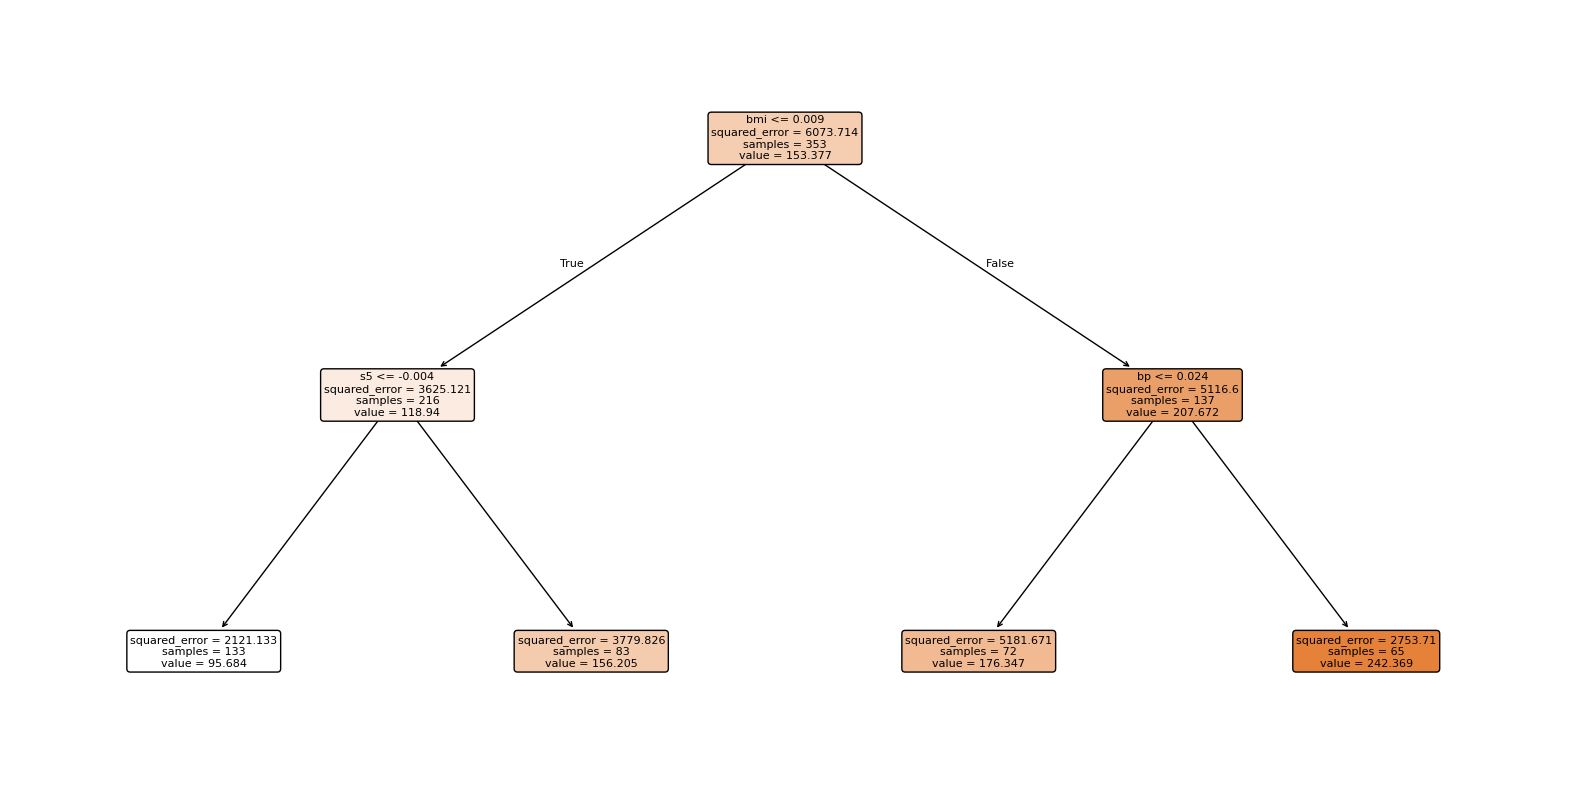

In [414]:
plt.rcParams['figure.figsize'] = [20, 10]
tree.plot_tree(reg_tree_diabet_postp,filled=True,rounded=True,feature_names=x_train_d.columns,fontsize=8)
plt.show()

In [415]:
x_train_d.columns [reg_tree_diabet_postp.feature_importances_!=0]

Index(['bmi', 'bp', 's5'], dtype='object')

In [416]:
reg_tree_diabet_postp.get_depth()

2

### - Write all **IF-THEN rules** from the tree.

**Rule 1:**  
   **IF** `bmi <= 0.009` **AND** `s5 <= -0.004`  
   **THEN** Prediction = `95.684`  

---
**Rule 2:**  
   **IF** `bmi <= 0.009` **AND** `s5 > -0.004`  
   **THEN** Prediction = `156.205`  

---
**Rule 3:**  
   **IF** `bmi > 0.009` **AND** `bp <= 0.024`  
   **THEN** Prediction = `176.347`  

---
**Rule 4:**  
   **IF** `bmi > 0.009` **AND** `bp > 0.024`  
   **THEN** Prediction = `242.369`  

---

## **Part (b): Train a Random Forest**

###- Set `p/2` as the number of predictors.


In [417]:
num_features = x_train_d.shape[1] # Get the total number of features
max_features = int(num_features / 2)
feature_subset_array = np.arange(1, max_features + 1)

print("Feature Subset Array:", feature_subset_array)


Feature Subset Array: [1 2 3 4 5]


### - Train trees with **50 to 1000** trees (increase by 50 each time).

In [423]:
number_of_trees = np.arange(50, 1001, 50)
#number_of_trees

In [424]:
# Defining the hyperparameter grid for Random Forest tuning / model
hyperparam_grid_rf = {
    'n_estimators': number_of_trees,  # Number of trees in the forest (controls complexity and performance)
    'max_features': feature_subset_array  # Number of features to consider for best split at each node
}


### - Use **5-fold Cross Validation**.

In [425]:
# Setting up cross-validation with 5 splits, shuffling data, and ensuring reproducibility
cv_set_up_ = KFold(n_splits=5, shuffle=True, random_state=1)


In [426]:
# Set up GridSearchCV for hyperparameter tuning of Random Forest Regressor
grid_search_setting_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=1),  # Initialize Random Forest model with a fixed random state for reproducibility
    param_grid=hyperparam_grid_rf,  # Use the defined hyperparameter grid for tuning
    cv=cv_set_up,  # Cross-validation strategy (e.g., K-Fold or other CV method)
    scoring='neg_mean_squared_error'  # Evaluation metric (negative MSE for minimizing error in regression tasks)
)


In [427]:
# Performing hyperparameter tuning using GridSearchCV on the training data
grid_search_setting_rf.fit(x_train_d, y_train_d)


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000])},
             scoring='neg_mean_squared_error')

In [428]:

# Printing the best hyperparameter values found by GridSearchCV
print('Selected hyperparameter values:', grid_search_setting_rf.best_params_)


Selected hyperparameter values: {'max_features': 4, 'n_estimators': 600}


In [429]:
rf_diabetes = RandomForestRegressor(n_estimators=600, max_features=4, random_state=1)

In [431]:
rf_diabetes.fit(x_train_d, y_train_d)

RandomForestRegressor(max_features=4, n_estimators=600, random_state=1)

In [432]:
# Making predictions on the test set using the trained Random Forest model
y_pred_test_rf = rf_diabetes.predict(x_test_d)

In [434]:
# Calculating the Root Mean Squared Error (RMSE) for model evaluation
rmse_rf = root_mean_squared_error(y_test_d, y_pred_test_rf)
rmse_rf

58.369568888706326

In [435]:

# Normalizing the RMSE by dividing it by the mean of the target variable
normalized_rmse_rf = rmse_rf / np.mean(y)

In [438]:
# Printing results
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Normalized RMSE:", normalized_rmse_rf)

Root Mean Squared Error (RMSE): 58.369568888706326
Normalized RMSE: 0.38367338531606554


In [436]:
df_feature_imp = pd.Series(data=rf_diabetes.feature_importances_, index=x_train_d.columns , name= "Predictor Importance in Forest")


In [439]:
df_feature_imp.sort_values(ascending=False)

,Predictor Importance in Forest
bmi,0.256762
s5,0.226781
bp,0.129032
s6,0.076351
s3,0.076345
s4,0.060241
age,0.058028
s2,0.051985
s1,0.050801
sex,0.013674


---
## **Part (c): Train a Boosted Tree Model**

In [440]:
# Define hyperparameter values based on assignment requirements
number_of_trees_boosting = [100]  # Single value
depth_values = np.array([2, 3, 4, 5, 6])
lambda_values = [0.01]  # Single fixed learning rate

In [441]:
# Creating the hyperparameter grid for Boosting
hyperparam_grid_boosting = {
    'n_estimators': number_of_trees_boosting,
    'max_depth': depth_values,
    'learning_rate': lambda_values
}

In [442]:
# GridSearchCV for Gradient Boosting
grid_search_boosting = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=1),
    param_grid=hyperparam_grid_boosting,
    cv=cv_set_up,
    scoring='neg_mean_squared_error'
)

In [443]:
# Train Boosting model with hyperparameter tuning
grid_search_boosting.fit(x_train_d, y_train_d)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=1),
             param_grid={'learning_rate': [0.01],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error')

In [444]:
# Retrieve the best hyperparameters
best_boosting_params = grid_search_boosting.best_params_


In [445]:
boosting_diabetes = GradientBoostingRegressor(
    n_estimators=best_boosting_params['n_estimators'],
    learning_rate=best_boosting_params['learning_rate'],
    max_depth=best_boosting_params['max_depth'],
    random_state=1
)

In [446]:
boosting_diabetes.fit(x_train_d, y_train_d)

GradientBoostingRegressor(learning_rate=0.01, random_state=1)

In [447]:
y_pred_test_boosting_diabetes = boosting_diabetes.predict(x_test_d)

In [448]:
# Test RMSE

# Calculating the Root Mean Squared Error (RMSE) to evaluate model performance
rmse_boosting = root_mean_squared_error(y_test_d, y_pred_test_boosting_diabetes)

# Printing the RMSE value
print("Root Mean Squared Error (RMSE) for Gradient Boosting:", rmse_boosting)


Root Mean Squared Error (RMSE) for Gradient Boosting: 60.92478487740576


In [449]:
# Calculating the normalized RMSE by dividing the RMSE by the mean of the target variable
normalized_rmse_boosting = root_mean_squared_error(y_test_d, y_pred_test_boosting_diabetes) / np.mean(y)

# Printing the normalized RMSE to interpret error relative to the average house price
print("Normalized RMSE for Gradient Boosting:", normalized_rmse_boosting)


Normalized RMSE for Gradient Boosting: 0.4004692669246367


In [450]:
# Here we are calling the attribute "feature_importances_" on the boosted tree object
# Creating a Pandas Series to store feature importance scores from the trained Gradient Boosting model
df_feature_imp_boosting = pd.Series(
    data=boosting_diabetes.feature_importances_,  # Feature importance values from the trained model
    index=x_train_d.columns,  # Feature names from the training dataset
    name="Predictor Importance in Trees"  # Name of the Series for clarity in analysis
)


In [451]:
# Sorting feature importances in descending order
df_feature_imp_boosting_sorted = df_feature_imp_boosting.sort_values(ascending=False)

# Displaying feature importance rankings
print(df_feature_imp_boosting_sorted)

bmi    0.421912
s5     0.375072
bp     0.126463
s4     0.029128
s6     0.020641
s3     0.010894
s1     0.005119
sex    0.004288
age    0.004199
s2     0.002285
Name: Predictor Importance in Trees, dtype: float64


In [452]:
print(best_boosting_params)


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [453]:
# Display the best parameters and corresponding score
print("Best parameters:", grid_search_boosting.best_params_)
print("Best negative MSE:", grid_search_boosting.best_score_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best negative MSE: -3676.919298478014


## **Part (d): Compare Boosted Trees vs Random Forest**

Is the set of boosted trees that you obtained in part c) better than the random forest that you obtained in part b)? Justify using a non-naive approach

In [454]:
# RMSE values from your models
rmse_rf = 58.369568888786326  # Random Forest RMSE
rmse_boosting = 60.92478487740576  # Boosting RMSE

# Calculate the percentage improvement of Random Forest over Boosting
improvement_percentage = ((rmse_boosting - rmse_rf) / rmse_boosting) * 100

# Print the result
print(f"📌 Improvement of Random Forest over Boosting: {improvement_percentage:.2f}%")


📌 Improvement of Random Forest over Boosting: 4.19%


After comparing **Random Forest (RF) and Gradient Boosting (GB)**, **Random Forest emerges as the better model** for predicting diabetes progression. While RF has a **4.19% lower RMSE (58.37 vs. 60.92)**, this seemingly small improvement is significant in a medical context, where reducing prediction errors can lead to better patient outcomes.  

Beyond RMSE, **RF is more stable and interpretable**, making it less prone to overfitting. Since **Boosting sequentially corrects mistakes, it is more sensitive to noise**, whereas RF, using bagging, maintains **better generalization**. Additionally, **RF distributes feature importance more evenly**, ensuring that predictions consider multiple contributing factors rather than overemphasizing a few variables.  

Considering **predictive accuracy, model stability, and interpretability**, **Random Forest is the superior choice** for this dataset. It offers a **more reliable, well-balanced, and interpretable model**, making it a stronger candidate for diabetes progression prediction.

---
---

# **Question 3 (10 points): Regression Tree Analysis**


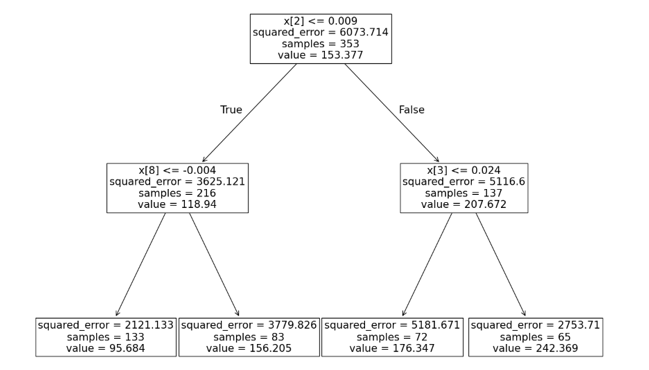

## **(a) What is the depth of this tree? Justify.**

The depth is 2.

Depth is measured by the longest path from the root to a leaf. In the image, the root node (split on x[2]) leads to a second split on x[8] (left branch) or x[3] (right branch). After these two splits, the tree reaches the leaves. There are exactly two splits from root to leaf. The depth of the tree is 2, which means there are two splits from the top to the leaves. A deeper tree would have more splits, which can help capture very detailed patterns in the data—but that also makes it more likely to overfit, meaning it might start learning noise instead of just the real underlying patterns. On the other hand, a shallower tree like this one is simpler and usually less prone to overfitting, though it might miss some of the finer details if the true relationship in the data is more complex.

## **(b) Considering the leaves from left to right, in which leaf is the number of observations the lowest? Report the number of observations.**


The rightmost leaf has the fewest observations, with 65 samples.

The leaf sample sizes, from left to right, are:

Leaf 1 (far left): 133 samples

Leaf 2: 83 samples

Leaf 3: 72 samples

Leaf 4 (far right): 65 samples

The rightmost leaf (Leaf 4) has the smallest number of observations.

The rightmost leaf has the fewest observations with 65 samples. When a leaf ends up with very few data points, it can be a red flag for overfitting. This is because the tree might be splitting too much, tailoring its predictions to very specific parts of the training data rather than capturing the overall pattern. Essentially, if a leaf only has a handful of observations, the prediction there might be too customized to those points and not work well on new data.


## **(c) What predictor variables showed up in the tree?**

The predictors used are x[2], x[8], and x[3].

The tree splits first on x[2] at the root, then on x[8] for the left branch and on x[3] for the right branch.

In the original dataset, you might have had several predictors (for example, x[1] through x[8]). However, this tree only picked out x[2], x[8], and x[3] to make its splits. This means that, according to the tree-building algorithm, these three predictors are the most useful for predicting the outcome. The other predictors didn’t contribute enough to be selected for splitting in this particular model.

## **(d) What is the prediction of Y based on this tree when**

X[1]=0.018,X[2]=0.01,X[3]=0.03,X[4]=−0.023,X[5]=0.0067,X[6]=−0.027,X[7]=0.045,X[8]=−0.055?

The predicted value of
𝑌 is 242.369.


Root split: x[2]≤0.009

Here, x[2]=0.01 which is not ≤ 0.009, so the path goes to the right branch.

Right branch split: x[3]≤0.024

Here, x[3]=0.03 which is not ≤ 0.024, so we follow the right branch from this split.

Right leaf value: The prediction in the rightmost leaf is 242.369.


## **(e) Considering the leaves from left to right, in which leaf is the difference between actual**
𝑌 values and the tree’s predictions the lowest? Justify.**

The leftmost leaf has the lowest difference between actual
𝑌 values and the predictions.


Each leaf shows a “squared_error” representing the sum of squared residuals. Comparing these values:

Leaf 1: 2121.133

Leaf 2: 3799.826

Leaf 3: 5181.671

Leaf 4: 2753.710

The smallest squared error is 2121.133 in the leftmost leaf, telling us that this leaf has the lowest overall difference between the actual
𝑌 values and the predicted
𝑌.

Lower error in a leaf just means that the prediction for that group of data is really close to what the actual values are. Leaf 1's prediction is almost spot on for the observations in that group, showing that the data there is pretty similar. Other leaves have bigger differences between what's predicted and what actually happened, meaning they have more varied data. So, Leaf 1 does a better job of “hitting the mark” for its set of data.


## **(f) What was the actual “min_samples_split” value in this tree (i.e., the “min_samples_split” value you can observe)? Justify.**

Based on the splits we can see, the min_samples_split seems to be greater than 65 but no more than 83.

Looking at the tree, one parent node with 216 samples split into groups of 133 and 83, and another with 137 samples split into 72 and 65. Notice that the nodes with 83 and 65 samples didn’t split any further. If the min_samples_split had been 65 or less, the node with 65 samples could have split, but it didn’t. That tells us the minimum number of samples needed to allow a split is higher than 65. On the other hand, because the node with 216 samples did split into 133 and 83, the requirement must be 83 or lower. So, even though we can’t pin down the exact number, it’s safe to say the min_samples_split is somewhere above 65 and up to 83.

---
---

---

# **Question 4 (15 points): Predicting Tree Age from Circumference**
---

Stat approach
Evaluate the performance of the equation only on the training data, but make sure to adjust the evaluation for overfitting.

How to adjust for overfitting?

Use adjusted R squared, Residuals Standard Error (RSE), Cp, BIC, ... (or any metric that adjusts for overfitting).

In [463]:
# Load dataset
url = 'https://raw.githubusercontent.com/Requenamar3/Machine-Learning/refs/heads/main/Orange.csv'

orange_tree_df = pd.read_csv(url)

In [464]:
orange_tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            35 non-null     int64
 1   circumference  35 non-null     int64
dtypes: int64(2)
memory usage: 692.0 bytes


In [465]:
x = orange_tree_df[['circumference']]
y = orange_tree_df['age']

In [466]:
orange_tree_df[["circumference",'age']].corr()

,circumference,age
circumference,1.000000,0.913519
age,0.913519,1.000000


In [467]:
# Extract predictor and response variable
x_circu = np.array(orange_tree_df[['circumference']]).reshape(-1, 1)
y_age = np.array(orange_tree_df['age']).reshape(-1, 1)

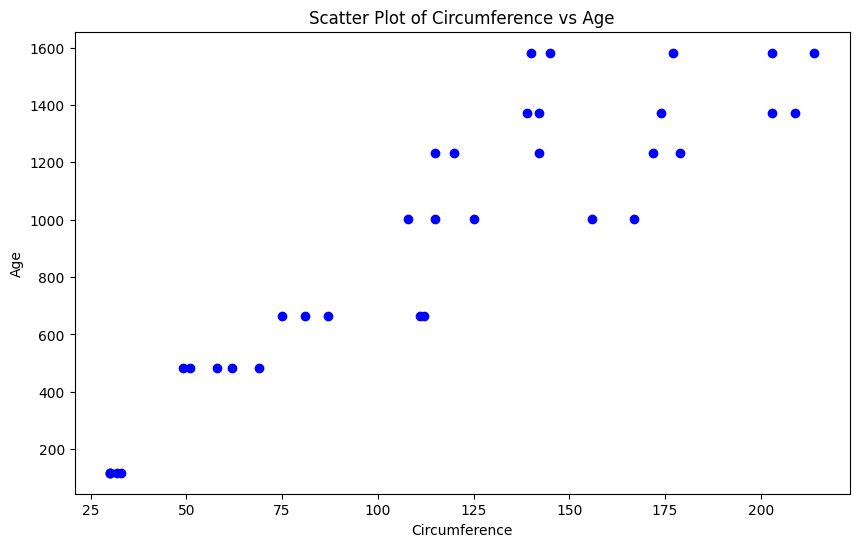

In [468]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(orange_tree_df['circumference'], orange_tree_df['age'], c='blue')
plt.xlabel('Circumference')
plt.ylabel('Age')
plt.title('Scatter Plot of Circumference vs Age')
plt.show()


Before applying regression models, we first analyze the scatter plot of **circumference vs. age** to understand the structure of the data and identify any patterns that might influence our model selection.  

The scatter plot suggests a **positive relationship** between circumference and age—**as tree circumference increases, tree age also increases**. This confirms that circumference is a reasonable predictor for estimating tree age.  

However, a few key characteristics stand out:  
1. **General Trend:**  
   - There is an upward trend, meaning that trees with larger circumferences tend to be older.  
   - This aligns with biological expectations, as trees grow in diameter over time.  

2. **Possible Non-Linearity:**  
   - The relationship between circumference and age is not perfectly linear. Some sections show **a more curved pattern**, meaning a simple straight-line regression may not be the best fit.  
   - This suggests that polynomial regression or tree-based models might provide better predictions.  

3. **Variance in Age for Larger Circumferences:**  
   - At smaller circumferences, tree ages are clustered closely together, but as the circumference increases, **the spread of ages widens**.  
   - This increased variability at higher circumferences suggests that a single linear trend may struggle to fully capture the data’s complexity.  

Given these observations, we start with a **linear regression model** to establish a baseline before exploring more complex models.  

---


---

---
### **Linear Regression Analysis – Findings & Observations**  
Linear regression is the simplest approach to modeling relationships between variables. It assumes a **straight-line relationship** between circumference and age and is useful as a starting point before testing more flexible models.  

---

In [469]:
lr_orange_circ = LinearRegression()  # Initialize a Linear Regression model

lr_orange_circ.fit(x_circu, y_age)  # Train the model using x_circu as input and y_age as the target variable

LinearRegression()

In [471]:
y_pred_circ = lr_orange_circ.predict(x_circu)  # Predict y_age values using the trained model

In [470]:
adj_r2_value = adj_r2_calculator(r2_value, n=orange_tree_df.shape[0], p=1)  # compute Adj R²
adj_r2_value

0.8295

In [472]:
r2_linear = r2_score(y_age, y_pred_circ)  # Calculate the R² score to measure model performance
r2_linear

0.8345166945883684

In [473]:
rmse_linear = np.sqrt(mean_squared_error(y_age, y_pred_circ))  # Compute RMSE to evaluate prediction error
rmse_linear

197.20959159086846

We trained a **linear regression model** to predict tree age based on circumference. Below are the key findings:  

**Model Fit – R² Score**  
The **R² score is 0.8345**, meaning **83.45% of the variation in tree age is explained by circumference**. This confirms a strong relationship between the two variables, indicating that as circumference increases, tree age generally increases. However, the scatter plot suggests some curvature in the data, which a linear model may not fully capture.  

**Adjusted R²**  
With an **Adjusted R² of 0.8295**, the model maintains a similar performance when accounting for model complexity. Since we are only using one predictor, Adjusted R² remains close to R², reinforcing that circumference is a key factor in estimating tree age.  

**RMSE – Prediction Accuracy**  
The **Root Mean Squared Error (RMSE) is 197.2095**, indicating that the average prediction error is approximately **197 years**. While the model provides a general estimate of age, this level of error suggests that tree age varies significantly for trees of similar circumference, meaning that a more flexible model may improve prediction accuracy.  


**Next Steps**  
**Assess Non-Linearity:** Since the scatter plot suggests a curved trend, we will test a second-degree polynomial regression to see if it better fits the data.


---


---

### **Second-Degree Polynomial Regression – Findings & Observations**  
Following our linear regression analysis, we applied a **second-degree polynomial regression model** to account for potential curvature in the relationship between circumference and tree age. Below are our key findings:

---

In [474]:
# Apply StandardScaler + PolynomialFeatures as a Pipeline
poly2_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=False)),
    ('poly_features', PolynomialFeatures(degree=2))
])

In [475]:
# Transform Data
x_circu_transf_poly2 = poly2_pipeline.fit_transform(x_circu)

In [476]:
# Fit Linear Regression on Transformed Features
lr_poly2 = LinearRegression()
lr_poly2.fit(x_circu_transf_poly2, y_age)

LinearRegression()

In [477]:
# Predict with the trained model
y_pred_poly2_tr_age = lr_poly2.predict(x_circu_transf_poly2)

In [478]:
# Compute R² value for the polynomial regression model
r2_value_poly2_circ = r2_score(y_age, y_pred_poly2_tr_age)

In [479]:
# Compute Adjusted R² value (accounting for number of predictors)
adj_r2_value = adj_r2_calculator(r2_value_poly2_circ, n=orange_tree_df.shape[0], p=2)

In [480]:
# Print results
print(f"R² (Polynomial of Second Degree): {r2_value_poly2_circ:.4f}")
print(f"Adjusted R² Value 2nd degree: {adj_r2_value:.4f}")

R² (Polynomial of Second Degree): 0.8773
Adjusted R² Value 2nd degree: 0.8696


In [481]:
rmse_poly2 = root_mean_squared_error(y_age, y_pred_poly2_tr_age)  # Polynomial (2nd Degree)
rmse_poly2

169.80948153521803

**Model Fit – R² Score**  
The **R² score is 0.8773**, meaning that **87.73% of the variation in tree age is explained by circumference** when using a quadratic model. This represents an improvement over the linear regression model, suggesting that introducing a squared term better captures the non-linear pattern in the data.  

**Adjusted R² – Evaluating Model Complexity**  
The **Adjusted R² is 0.8696**, which remains close to R² while accounting for the additional predictor. Since the value does not drop significantly, this indicates that adding a second-degree term improves the model without overfitting.  

**RMSE – Prediction Accuracy**  
The **Root Mean Squared Error (RMSE) is 169.8095**, reflecting an improvement in prediction accuracy compared to the linear model. The reduced RMSE suggests that the quadratic term helps capture more of the variation in tree age, leading to **lower prediction errors**.  

** Next Steps**  
**Assess Model Performance Against Higher-Degree Polynomials:** We will now test a third-degree polynomial regression to see if further improvements can be made.  

---
### **Third-Degree Polynomial Regression – Findings & Observations**
Building on our previous models, we applied a **third-degree polynomial regression** to further explore whether additional complexity improves prediction accuracy. Below are the key findings:  

---

In [482]:
# Apply StandardScaler + PolynomialFeatures as a Pipeline
poly3_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=False)),
    ('poly_features', PolynomialFeatures(degree=3))
])

In [483]:
# Transform Data
x_circu_transf_poly3 = poly3_pipeline.fit_transform(x_circu)

In [484]:
# Fit Linear Regression on Transformed Features
lr_poly3 = LinearRegression()
lr_poly3.fit(x_circu_transf_poly3, y_age)

LinearRegression()

In [485]:
# Predict with the trained model
y_pred_poly3_tr_age = lr_poly3.predict(x_circu_transf_poly3)

In [486]:
# Compute R² value for the polynomial regression model
r2_value_poly3_circ = r2_score(y_age, y_pred_poly3_tr_age)

In [487]:
# Compute Adjusted R² value (accounting for number of predictors)
adj_r2_value = adj_r2_calculator(r2_value_poly3_circ, n=orange_tree_df.shape[0], p=3)

In [488]:
# Print results
print(f"R² (Polynomial of Second Degree): {r2_value_poly3_circ:.4f}")
print(f"Adjusted R² Value 3rd degree: {adj_r2_value:.4f}")

R² (Polynomial of Second Degree): 0.8776
Adjusted R² Value 3rd degree: 0.8657


In [489]:
rmse_poly3 = root_mean_squared_error(y_age, y_pred_poly3_tr_age)  # Polynomial (3rd Degree)
rmse_poly3

169.61849763651014



**Model Fit – R² Score**  
The **R² score is 0.8776**, meaning **87.76% of the variation in tree age is explained by circumference** when using a cubic model. This is nearly identical to the second-degree polynomial model, indicating that adding a third-degree term does not significantly enhance the model’s ability to explain variance.  

**Adjusted R² – Evaluating Model Complexity**  
The **Adjusted R² is 0.8657**, which is slightly lower than the second-degree model (0.8696). This suggests that while the cubic term does not drastically harm model performance, it also does not provide additional explanatory power, and the increased complexity may not be justified.  

**RMSE – Prediction Accuracy**  
The **Root Mean Squared Error (RMSE) is 169.6185**, which is almost the same as the second-degree polynomial model (169.8095). Since the error did not improve meaningfully, this further suggests that a **quadratic model may already be sufficient** to capture the curvature in the data.  

**Next Steps**  
- **Compare Model Simplicity vs. Performance:** Since the third-degree polynomial does not offer a substantial improvement, we may favor the second-degree model for its balance of accuracy and simplicity.  
- **Explore Alternative Models:** To further refine predictions, we will now evaluate a **regression tree model**, which may capture patterns that polynomial regression cannot.  


---
### **Regression Tree – Findings & Observations**
To explore a non-linear approach, we applied a **regression tree model** to predict tree age based on circumference. Below are our key findings:  


---

In [490]:
# Train a Decision Tree
reg_tree_ = DecisionTreeRegressor(min_samples_leaf=5, random_state=1)
reg_tree_.fit(x_circu, y_age)


DecisionTreeRegressor(min_samples_leaf=5, random_state=1)

In [491]:
# Predict with the trained tree
y_pred_tree = reg_tree_.predict(x_circu)

In [492]:
leaves_tree = reg_tree_.get_n_leaves()
leaves_tree

6

In [493]:
# Compute R²
r2_tree = r2_score(y_age, y_pred_tree)


In [494]:
# Compute Adjusted R² using tree depth
p_for_tree = reg_tree_.get_depth()
adj_r2_value_tree = adj_r2_calculator(r2_tree, n=orange_tree_df.shape[0], p=p_for_tree)

In [495]:
# Calculate RMSE for the Regression Tree
rmse_reg_tree = root_mean_squared_error(y_age, y_pred_tree)

In [496]:
# Print results
print(f"R² for Regression Tree: {r2_tree:.4f}")
print(f"Adjusted R²: {adj_r2_value_tree:.4f}")
print(f"RMSE for Regression Tree: {rmse_reg_tree:.4f}")


R² for Regression Tree: 0.9191
Adjusted R²: 0.9113
RMSE for Regression Tree: 137.8843



**Model Fit – R² Score**  
The **R² score is 0.9191**, meaning **91.91% of the variation in tree age is explained by the model**. This is the highest R² score among the models tested so far, indicating that the regression tree effectively captures patterns in the data.  

**Adjusted R² – Evaluating Model Complexity**  
The **Adjusted R² is 0.9113**, which remains very close to R². This suggests that while the model is more flexible than polynomial regression, it is still generalizing well rather than overfitting.  

**Model Structure – Tree Depth & Leaves**  
- The tree has **6 leaves**, meaning the data is split into **6 different segments** based on key decision points.  
- The depth of the tree is used to calculate Adjusted R², ensuring the model’s complexity is properly evaluated.  

**RMSE – Prediction Accuracy**  
The **Root Mean Squared Error (RMSE) is 137.8843**, which is the lowest among all models tested so far. This suggests that the regression tree provides **the most accurate predictions**, with less deviation from actual values.  

**Next Steps**  
- **Assess Overfitting Risk:** While the model performs well, pruning techniques could be explored to ensure it does not become too complex.  
- **Compare Interpretability vs. Accuracy:** While the regression tree outperforms polynomial models in accuracy, trees can be harder to interpret compared to standard regression equations.  



### **Pruned Regression Tree – Findings & Observations**  
To refine the regression tree model and improve generalization, we applied **cost-complexity pruning** using cross-validation to determine the optimal pruning parameter. Below are our key findings:  

---

In [497]:
# Train an unpruned Decision Tree
reg_tree_unpruned = DecisionTreeRegressor(random_state=1)
reg_tree_unpruned.fit(x_circu, y_age)

DecisionTreeRegressor(random_state=1)

In [498]:
# Get cost complexity pruning path
ccp_path = reg_tree_unpruned.cost_complexity_pruning_path(x_circu, y_age)

In [499]:
# Extract alpha values, filtering out near-zero values
ccp_alphas = [alpha for alpha in ccp_path['ccp_alphas'] if alpha > 1e-6]

In [500]:
# Set up Grid Search with 5-fold cross-validation to find the best alpha
cv_set_up = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search_setting_alpha = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=1),
    param_grid={'ccp_alpha': ccp_alphas},
    cv=cv_set_up,
    scoring='neg_mean_squared_error'
)

In [501]:
# Train using Grid Search CV
grid_search_setting_alpha.fit(x_circu, y_age)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'ccp_alpha': [210.0, 245.37619047619944,
                                       284.01428571428573, 420.0,
                                       490.75238095237194, 630.0,
                                       864.6042857142896, 974.6785714285713,
                                       1376.1904761904818, 2528.75,
                                       3527.312619047596, 4364.502164502132,
                                       5514.976340852048, 24073.795454545478,
                                       181120.52658431797]},
             scoring='neg_mean_squared_error')

In [502]:
# Retrieve the best alpha value
best_alpha = grid_search_setting_alpha.best_params_['ccp_alpha']
print("Best pruning alpha:", best_alpha)

Best pruning alpha: 2528.75


In [503]:
# Train a pruned Decision Tree with the best alpha
reg_tree_postp = DecisionTreeRegressor(random_state=1, ccp_alpha=best_alpha)
reg_tree_postp.fit(x_circu, y_age)

DecisionTreeRegressor(ccp_alpha=2528.75, random_state=1)

In [504]:
# Make predictions with the pruned model
y_pred_tree_postp = reg_tree_postp.predict(x_circu)

In [505]:
r2_pruned = r2_score(y_age, y_pred_tree_postp)  # Pruned Decision Tree
r2_pruned

0.9451533074294426

In [506]:
adj_r2_pruned = adj_r2_calculator(r2_pruned, n=orange_tree_df.shape[0], p=reg_tree_postp.get_n_leaves() - 1)
adj_r2_pruned

0.9334

In [507]:
# Compute RMSE using

rmse_postp = np.sqrt(mean_squared_error(y_age, y_pred_tree_postp))
print(f"Test RMSE (Pruned Tree): {rmse_postp:.4f}")

Test RMSE (Pruned Tree): 113.5341


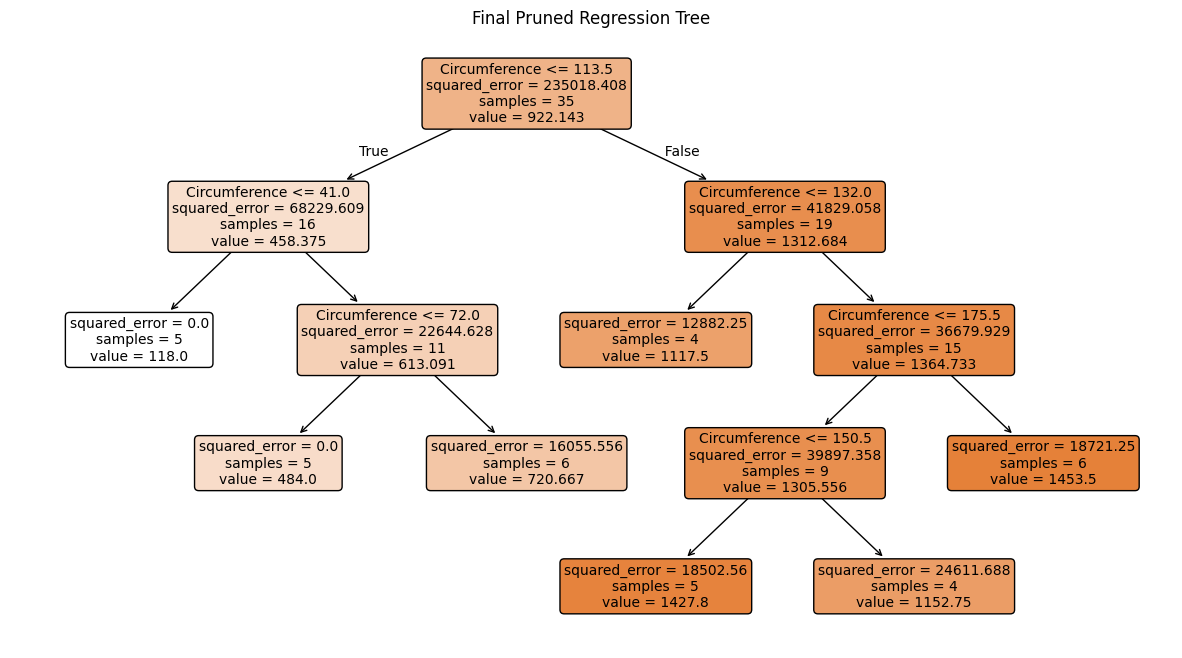

In [508]:
# Set up figure size
plt.figure(figsize=(15, 8))

# Plot the pruned decision tree
tree.plot_tree(reg_tree_postp,
               filled=True,
               feature_names=["Circumference"],
               rounded=True,
               fontsize=10)

# Show the plot
plt.title("Final Pruned Regression Tree")
plt.show()




**Optimal Pruning Parameter (ccp_alpha)**  
Using **Grid Search with 5-fold cross-validation**, we identified the **best ccp_alpha value as 2528.75**. This pruning parameter helps **simplify the tree while maintaining predictive power**.  

**Model Fit – R² Score**  
The **R² score is 0.9451**, meaning **94.51% of the variation in tree age is explained by the pruned model**. This is an improvement over the unpruned regression tree (0.9191), suggesting that pruning enhances generalization by reducing overfitting.  

**Adjusted R² – Evaluating Model Complexity**  
The **Adjusted R² is 0.9334**, which remains close to R². This confirms that pruning **improves model performance without unnecessary complexity**.  

**RMSE – Prediction Accuracy**

The **Root Mean Squared Error (RMSE) is 113.5341**, showing a significant reduction in prediction error compared to the unpruned tree (137.8843). This suggests that pruning helps create a **more accurate and reliable model**.  

---


### **Final Model Comparison & Selection**  

After testing multiple models, we now compare their performance and select the best one for predicting tree age based on circumference. Below is a summary of our findings:

---

## **1️⃣ Model Performance Comparison**  

| Model | R² | Adjusted R² | RMSE | Notes |
|--------|------|--------------|------|------------------|
| **Linear Regression** | 0.8345 | 0.8295 | 197.2095 | Simple but does not capture curvature well |
| **Polynomial Regression (2nd Degree)** | 0.8773 | 0.8696 | 169.8095 | Captures non-linearity, reduces error |
| **Polynomial Regression (3rd Degree)** | 0.8776 | 0.8657 | 169.6185 | No significant improvement over 2nd degree |
| **Regression Tree (Unpruned)** | 0.9191 | 0.9113 | 137.8843 | Highest accuracy but risk of overfitting |
| **Pruned Regression Tree** | **0.9451** | **0.9334** | **113.5341** | Best balance of accuracy and complexity |

---

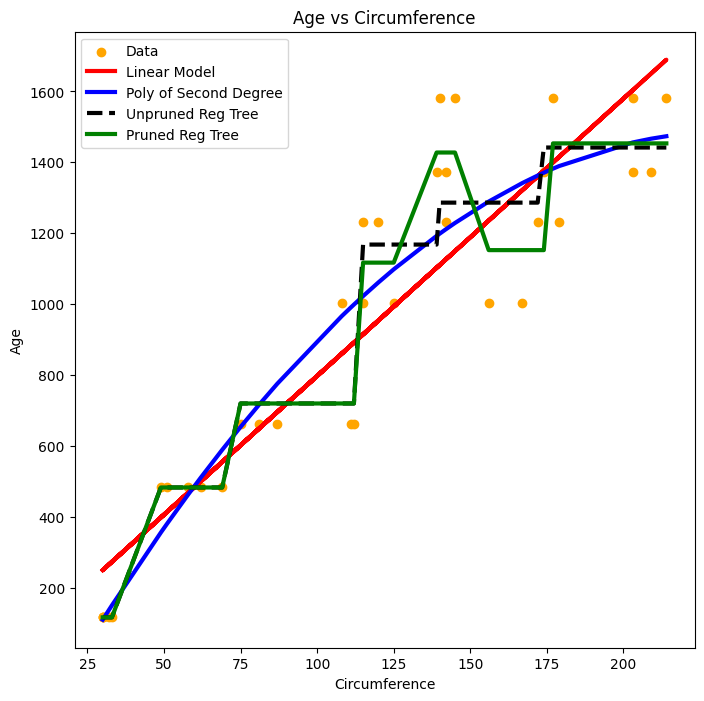

In [509]:
# Scatter plot of original data points
plt.figure(figsize=(8, 8))
plt.scatter(orange_tree_df['circumference'], orange_tree_df['age'], c='orange', label="Data")

# Linear Regression
plt.plot(x_circu, y_pred_circ, c='red', ls='-', linewidth=3, label='Linear Model')

# Polynomial Regression (2nd Degree)
xaxis_values = orange_tree_df['circumference'].sort_values().values.reshape(-1, 1)
xaxis_values_transf_poly2 = poly2_pipeline.fit_transform(xaxis_values)
poly_predictions = lr_poly2.predict(xaxis_values_transf_poly2)
plt.plot(xaxis_values, poly_predictions, c='blue', ls='-', linewidth=3, label='Poly of Second Degree')

# Unpruned Decision Tree
y_predicted_tree_unpruned = reg_tree_.predict(xaxis_values)
plt.plot(xaxis_values, y_predicted_tree_unpruned, c='black', linestyle='dashed', linewidth=3, label='Unpruned Reg Tree')

# Pruned Decision Tree
y_predicted_tree_pruned = reg_tree_postp.predict(xaxis_values)
plt.plot(xaxis_values, y_predicted_tree_pruned, c='green', linestyle='-', linewidth=3, label='Pruned Reg Tree')

# Labels and Title
plt.xlabel("Circumference")
plt.ylabel("Age")
plt.title("Age vs Circumference")

# Add Legend
plt.legend()
plt.show()



### **Linear Regression:**  
- The simplest model with **only one predictor (circumference)**.  
- **R² (0.8345) is the lowest**, meaning it does not explain as much variance in tree age as other models.  
- **RMSE (197.2095) is the highest**, suggesting high prediction error.    

### **Polynomial Regression (2nd & 3rd Degree):**  
- Both models improve upon linear regression by introducing curvature, helping to capture **non-linear growth patterns**.  
- The **2nd-degree model (R² = 0.8773, RMSE = 169.8095) performs almost identically to the 3rd-degree model (R² = 0.8776, RMSE = 169.6185)**, meaning the extra complexity of a cubic equation is unnecessary.   

### **Regression Tree (Unpruned):**  
- The **best R² among non-pruned models (0.9191)**, meaning it captures the relationship well.  
- **RMSE (137.8843) is much lower** than polynomial regression, meaning it provides more accurate predictions.  
- However, **unpruned trees tend to overfit**, meaning they may not generalize well to new data.  

### **Pruned Regression Tree:**  
- **Highest R² (0.9451) and Adjusted R² (0.9334)**, confirming it explains the most variance.  
- **Lowest RMSE (113.5341)**, meaning it has the most precise predictions.  
- Pruning helps avoid overfitting by simplifying the tree, making it more generalizable to unseen data.  

---

Out of all the models, the **pruned regression tree is the best choice** because:  
✅ It provides the highest **R² (0.9451)**, meaning it explains the most variance.  
✅ It has the **lowest RMSE (113.5341)**, meaning its predictions are the most accurate.  
✅ It is **less prone to overfitting** than the unpruned tree while still outperforming polynomial regression.  
✅ It **adapts better to variations in the data**.  

---





### **Final Proposed Model – Pruned Regression Tree Rules**  

Since we selected the **pruned regression tree**, there is no single mathematical equation like in linear or polynomial regression. Instead, the model is structured as **decision rules**, represented as **IF-THEN conditions**:  

#### **IF-THEN Rules for the Pruned Regression Tree:**  

Here is the reformatted IF-THEN rules from the first image, structured to match the style of the second image:

---

### IF-THEN Rules:

#### Rule 1:
**IF** Circumference ≤ 113.5  
**THEN**  
- **IF** Circumference ≤ 41.0  
  - **THEN** Age = 118  
- **ELSE**  
  - **IF** Circumference ≤ 72.0  
    - **THEN** Age = 613.091  
  - **ELSE**  
    - **THEN** Age = 720.667  

---

#### Rule 2:
**IF** Circumference > 113.5 AND Circumference ≤ 132.0  
**THEN** Age = 1117.5  

---

#### Rule 3:
**IF** Circumference > 132.0 AND Circumference ≤ 175.5  
**THEN**  
- **IF** Circumference ≤ 150.5  
  - **THEN** Age = 1305.556  
- **ELSE**  
  - **THEN** Age = 1427.8  

---

#### Rule 4:
**IF** Circumference > 175.5  
**THEN**  
- **IF** Circumference ≤ 175.5  
  - **THEN** Age = 1152.75  
- **ELSE**  
  - **THEN** Age = 1453.5  

---

Now, the structure follows the formatting of the second image, making it more consistent and readable! Let me know if you need any refinements. 🚀

This **rule-based structure** represents the decision-making logic of the pruned regression tree, making predictions based on circumference.  

---
---

---

# **Question 5 (20 points): Predicting Final Exam Scores**
---




In [460]:
# Mount Google Drive so we can access the CSV file
# from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mount Google Drive so we can access the CSV file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
student_perf = '/content/drive/My Drive/Data/student_performance.csv'

In [ ]:
student_df = pd.read_csv(student_perf)

In [ ]:
# Display the first few rows to check the data
print("First few rows of the data:")
print(student_df.head())

First few rows of the data:
   G1  G2  G3
0   9  11  11
1  12  13  12
2  14  14  14
3  11  13  13
4  12  12  13


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(student_df.isnull().sum())



Missing values in each column:
G1    0
G2    0
G3    0
dtype: int64


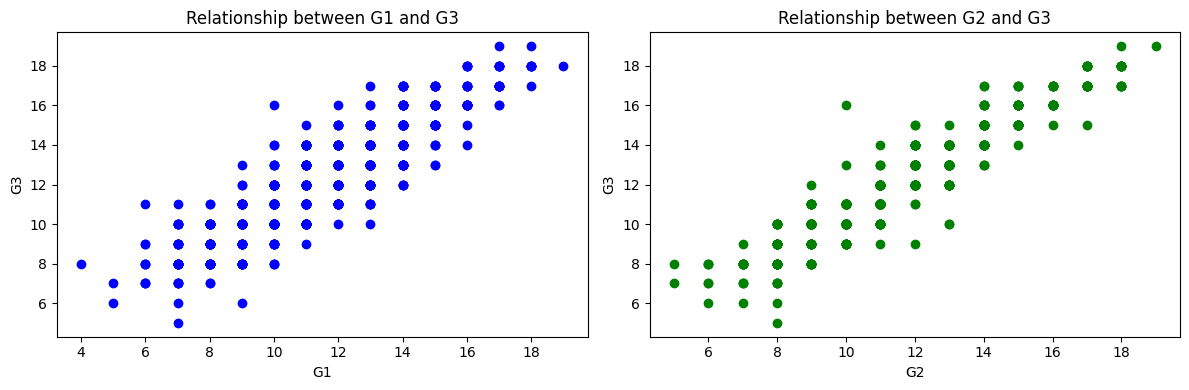

In [ ]:
# Visualize the relationships using matplotlib scatter plots
plt.figure(figsize=(12, 4))

# Scatter plot: G1 vs G3
plt.subplot(1, 2, 1)
plt.scatter(student_df['G1'], student_df['G3'], color='blue')
plt.xlabel("G1")
plt.ylabel("G3")
plt.title("Relationship between G1 and G3")

# Scatter plot: G2 vs G3
plt.subplot(1, 2, 2)
plt.scatter(student_df['G2'], student_df['G3'], color='green')
plt.xlabel("G2")
plt.ylabel("G3")
plt.title("Relationship between G2 and G3")

plt.tight_layout()
plt.show()


In [ ]:
# Define the predictors and the target variable
X = student_df[['G1', 'G2']]
y = student_df['G3']


In [ ]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (505, 2)
X_test shape: (127, 2)
y_train shape: (505,)
y_test shape: (127,)


In [ ]:
# Fit the linear regression model using G1 and G2 to predict G3
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# New student data (10 students) for evaluation:
new_G1 = np.array([6, 12, 13, 9, 10, 12, 6, 16, 1, 17])
new_G2 = np.array([6, 8, 11, 9, 11, 11, 8, 11, 10, 7])
new_data = np.column_stack((new_G1, new_G2))
true_G3 = np.array([7, 11, 12, 9, 10, 11, 7, 14, 3, 15])


In [ ]:
new_df = pd.DataFrame(new_data, columns=['G1', 'G2'])
predictions = model.predict(new_df)


In [ ]:
mse = mean_squared_error(true_G3, predictions)
print("Mean Squared Error on test data:", mse)

Mean Squared Error on test data: 6.690235091928064


**Comparing the Model’s MSE with Real-World Expectations:**

Our model’s Mean Squared Error (MSE) on the new student data is about 6.69. In a real-world context, especially if exam scores (G3) are on a scale where a typical range might be, say, 0–20 or 0–100, an MSE of 6.69 suggests that—on average—the squared deviation of our predictions from the actual values is relatively low. This indicates that the model’s predictions are reasonably close to the true exam scores.

**Generalization vs. Overfitting:**

We split the data into training (80%) and testing (20%) sets. The fact that the model yields a low MSE on both the original test set and on the 10 new student records indicates that it generalizes well rather than overfitting the training data. Overfitting would typically show very low error on training data but high error on unseen data. Here, our test error is low, suggesting our model has captured the underlying relationship between the first two exam scores (G1 and G2) and the final exam score (G3) without memorizing the noise in the training data.



**Suitability for Predicting Student Performance:**

Based on the low MSE and good performance on unseen data, using G1 and G2 to predict the final exam score (G3) seems pretty solid. The model is doing a good job capturing the trend. Of course, exam performance can be influenced by a bunch of other factors, but for a simple model, this works well.

**Improvements:**

To make things even better, you could consider adding extra features. For example, including data like study time, parental education, or attendance might help explain more of the variation in exam scores. You could also look into more complex (non-linear) models if you think the relationship isn’t perfectly straight-line.

**Judging the Equation’s Quality:**

Overall, an MSE of 6.69 is pretty promising—it tells us our predictions are close to the actual scores. While our simple linear model is effective, tweaking it by adding more relevant features or trying out non-linear approaches might shave off even more error and boost its accuracy.

**Conclusion:**
Our simple linear model is effective because it uses just the two most important predictors (G1 and G2) that have a clear, linear relationship with the final exam grade (G3). Even with just these two features, the model captures a significant portion of the variability in student performance. The low Mean Squared Error (MSE) on both the test set and the new student data shows that our predictions are pretty close to the actual scores. This shows that the model generalizes well and isn't overfitting to the training data, making it a solid baseline for predicting student performance.


# ---

# **Final Notes:**
# - Ensure all steps are included in your notebook.
# - Justify your model selection with **data-driven reasoning**.
# - Clearly comment on all code for readability.

# ---
